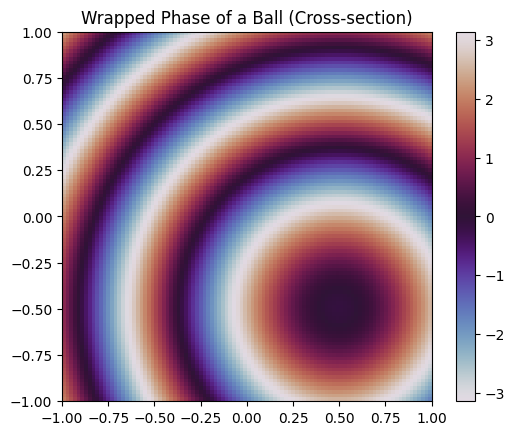

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Step 1: Define the 3D Space
x, y, z = np.meshgrid(np.linspace(-1, 1, 100), 
                      np.linspace(-1, 1, 100), 
                      np.linspace(-1, 1, 100))

# Step 2: Generate Spherical Phase Data
# Radius of the sphere
radius = 0.5

# Calculate radial distances from the center
radial_distances = np.sqrt((x - 0.5)**2 + (y - 0.5)**2 + (z - 0.5)**2)

# Define phase function - for simplicity, linearly proportional to the radial distance
phase_data = 2 * np.pi * radial_distances / radius

# Step 3: Wrap the Phase Data
wrapped_phase = np.angle(np.exp(1j * phase_data))

# Step 4: Visualization (Optional)
# For visualization, select a 2D cross-section, for example, z=0 plane
plt.imshow(wrapped_phase[:, :, 50], cmap='twilight', extent=[-1,1,-1,1])
plt.colorbar()
plt.title('Wrapped Phase of a Ball (Cross-section)')
plt.show()


In [2]:
wrapped_phase

(100, 100, 100)